<a href="https://colab.research.google.com/github/placeholder2/Heart-Disease-Prediction/blob/main/hd_fe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Heart Disease Factors Feature Engineering**

## Importing Libraries and Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import iqr,zscore
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder,LabelBinarizer
from sklearn.compose import make_column_transformer
import joblib

In [ ]:
# Plotting parameters
plt.rcParams.update({
    "xtick.major.size": 5,
    "xtick.major.pad": 20,
    "xtick.labelsize": 15,
    "ytick.labelsize": 15,
    "grid.color": "0.5",
    "grid.linestyle": "-",
    "grid.linewidth": 5,
    "lines.linewidth": 2,
    "lines.color": "g",
    "figure.figsize": (14,7),
    'axes.titlesize': 25,
    'axes.titlepad' : 20,
    'figure.autolayout': True,
})
plt.style.use('bmh')

# List of colors
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/heart_2020_cleaned.csv')

## **Removing Columns**
Based on statistical inference in previous notebook three columns in the dataset have no relevance to the target variable

In [ ]:
# Shape of raw dataset
df.shape

(319795, 18)

In [ ]:
# Dropping columns
df.drop(['MentalHealth', 'AlcoholDrinking', 'Race'], axis = 1, inplace=True)

In [ ]:
# Shape of without dropped columns
df.shape

(319795, 15)

## **Removing Outliers**
Using z-score

In [ ]:
def plot_kde(col):
  '''Function making kdeplot'''

  plot = sns.kdeplot(col,data = df,fill = True,legend = False)
  plot.set(xlabel=None)
  plt.title(col)

  return plot

In [ ]:
def grid(title):
  '''Function plotting distribution of numerical columns'''
  
  gs = plt.GridSpec(2, 2,hspace = 2.5)

  plt.figure()
  plt.suptitle(title,fontsize=16)

  ax = plt.subplot(gs[0, 0]) 
  plot_kde('PhysicalHealth')

  ax = plt.subplot(gs[0, 1]) 
  plot_kde('SleepTime')

  ax = plt.subplot(gs[1, :]) 
  plot_kde('BMI')
  plt.show

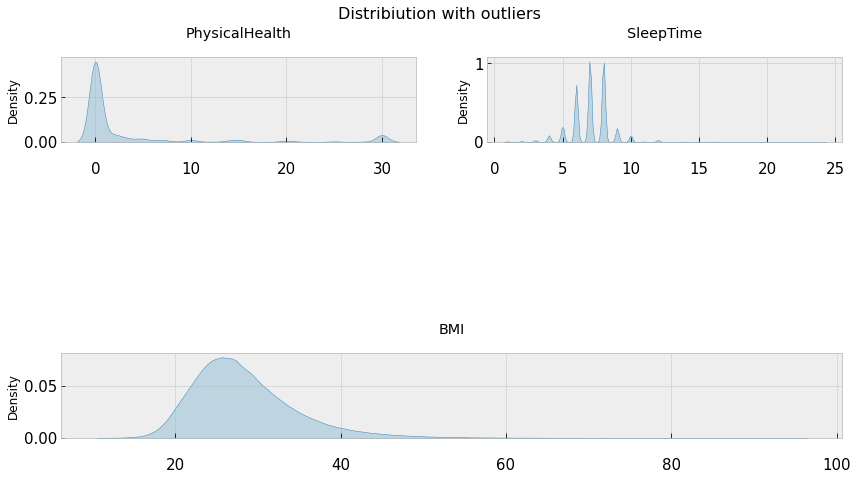

In [ ]:
grid('Distribiution with outliers')

In [ ]:
# Removing outliers
df = df[(np.abs(zscore(df.select_dtypes(exclude='object'))) < 3).all(axis=1)]

In [ ]:
# Shape without outliers
df.shape

(292783, 15)

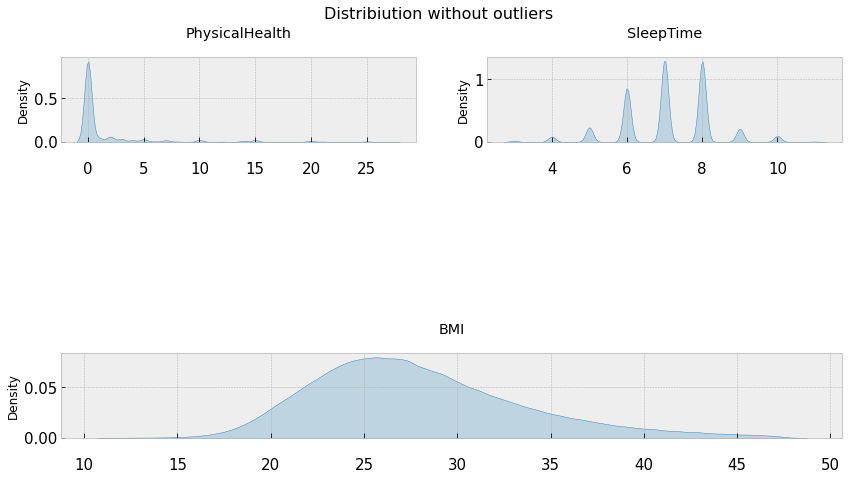

In [ ]:
grid('Distribiution without outliers')

## **Splitting dataset**

In [ ]:
# X/y split
X = df.drop(columns = ['HeartDisease']).copy()
y = df['HeartDisease']
# Train/test/validation split
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.8)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

In [ ]:
def print_shape():
  '''Function printing shape of all splitted sets'''
  
  Shape =  f'Shape of:\nX_train: {X_train.shape}\ny_train: {y_train.shape}\
            \nX_test: {X_test.shape}\ny_test: {y_test.shape}\
            \nX_valid: {X_valid.shape}\ny_valid:{y_valid.shape}'

  print(Shape)

In [ ]:
# Shape after splitting
print_shape()

Shape of:
X_train: (234226, 14)
y_train: (234226,)            
X_test: (29279, 14)
y_test: (29279,)            
X_valid: (29278, 14)
y_valid:(29278,)


## **Transforming Columns**

In [ ]:
# Ordinal columns
health = ['Poor','Fair','Good','Very good','Excellent']
age = [[age for age in df['AgeCategory'].unique()]]
age.sort()
# Categorical columns
cat_cols = [col for col in X.select_dtypes(include='object')]

In [ ]:
# Creating transformer
transformer = make_column_transformer(
    (OrdinalEncoder(categories=[health]), ['GenHealth']),
    (OrdinalEncoder(categories=age), ['AgeCategory']),
    (OneHotEncoder(), cat_cols),
    remainder='passthrough')

In [ ]:
# Transforming columns
transformer.fit(X_train)
X_train = transformer.transform(X_train)
X_test = transformer.transform(X_test)
X_valid = transformer.transform(X_valid)

In [ ]:
# Encoding target
lb = LabelBinarizer()

lb.fit(y_train)
y_train = lb.transform(y_train)
y_test = lb.transform(y_test)
y_valid = lb.transform(y_valid)

In [ ]:
# Shape after transforming
print_shape()

Shape of:
X_train: (234226, 43)
y_train: (234226, 1)            
X_test: (29279, 43)
y_test: (29279, 1)            
X_valid: (29278, 43)
y_valid:(29278, 1)


## **Saving The Results**

In [ ]:
# Saving the results
dataset_dict = {"X_train": X_train,"y_train": y_train, 
                "X_test": X_test,"y_test": y_test,
                "X_valid": X_valid,"y_valid": y_valid}

joblib.dump(transformer, 'transformer.pkl')
joblib.dump(dataset_dict, 'dataset_dict.pkl');

In [ ]:
# Writing bash script
sh = """
# !/bin/bash
: '
Script to move pickle files to project folder
'

FILES=$(find . -type f -name "*.pkl")

for file in $FILES; do
    mv $file '/content/drive/MyDrive/Colab Notebooks/HD'
    echo 'Done'
done;
"""
with open('script.sh', 'w') as file:
  file.write(sh)

# Executing script
!bash script.sh

Done
Done
